### Lab #1: MNIST Classification prediction

In [37]:
import json
import io
import boto3
import pickle
import urllib.request
import gzip
import numpy

#REPLACE WITH YOUR ENDPOINT NAME:
#ENDPOINT_NAME="<your_endpoint_name>"
ENDPOINT_NAME="Endpoint-891HD511"

# Simple function to create a csv from numpy array
def np2csv(arr):
    csv = io.BytesIO()
    numpy.savetxt(csv, arr, delimiter=',', fmt='%g')
    return csv.getvalue().decode().rstrip()

# Prepare input for the model
urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, _, _ = pickle.load(f, encoding='latin1')

payload = np2csv(train_set[0][30:31])

# Run prediction aganist the endpoint created by the pipeline
runtime = boto3.Session(region_name='us-west-2').client('sagemaker-runtime')
response = runtime.invoke_endpoint(EndpointName=ENDPOINT_NAME,
                                   ContentType='text/csv',
                                   Body=payload)
result = json.loads(response['Body'].read().decode())
print(result)

{'predictions': [{'distance_to_cluster': 7.306880474090576, 'closest_cluster': 1.0}]}


### Lab #2: CALTECH Elastic Inference and Multi-model Variant image classification prediction

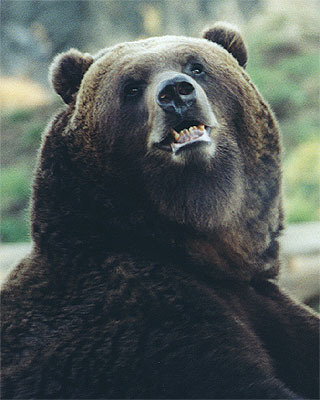

In [38]:
#!wget -O /tmp/test.jpg http://www.vision.caltech.edu/Image_Datasets/Caltech256/images/001.ak47/001_0007.jpg
file_name = '009_0023.jpg'
# test image
from IPython.display import Image
Image(file_name)

In [39]:
import json, boto3, numpy as np, time
client = boto3.client('runtime.sagemaker')

#file_name = '1000_dog.png'
with open(file_name, 'rb') as f:
    payload = f.read()

#REPLACE WITH YOUR ENDPOINT
#Endpoint-KV9RF2MR (m4.xlarge)
response = client.invoke_endpoint(EndpointName='Endpoint-KV9RF2MR', 
                                   ContentType='application/x-image', 
                                   Body=payload)

pred = json.loads(response['Body'].read().decode())
labels = ['ak47', 'american-flag', 'backpack', 'baseball-bat', 'baseball-glove', 'basketball-hoop', 'bat', 'bathtub', 'bear', 'beer-mug', 'billiards', 'binoculars', 'birdbath', 'blimp', 'bonsai-101', 'boom-box', 'bowling-ball', 'bowling-pin', 'boxing-glove', 'brain-101', 'breadmaker', 'buddha-101', 'bulldozer', 'butterfly', 'cactus', 'cake', 'calculator', 'camel', 'cannon', 'canoe', 'car-tire', 'cartman', 'cd', 'centipede', 'cereal-box', 'chandelier-101', 'chess-board', 'chimp', 'chopsticks', 'cockroach', 'coffee-mug', 'coffin', 'coin', 'comet', 'computer-keyboard', 'computer-monitor', 'computer-mouse', 'conch', 'cormorant', 'covered-wagon', 'cowboy-hat', 'crab-101', 'desk-globe', 'diamond-ring', 'dice', 'dog', 'dolphin-101', 'doorknob', 'drinking-straw', 'duck', 'dumb-bell', 'eiffel-tower', 'electric-guitar-101', 'elephant-101', 'elk', 'ewer-101', 'eyeglasses', 'fern', 'fighter-jet', 'fire-extinguisher', 'fire-hydrant', 'fire-truck', 'fireworks', 'flashlight', 'floppy-disk', 'football-helmet', 'french-horn', 'fried-egg', 'frisbee', 'frog', 'frying-pan', 'galaxy', 'gas-pump', 'giraffe', 'goat', 'golden-gate-bridge', 'goldfish', 'golf-ball', 'goose', 'gorilla', 'grand-piano-101', 'grapes', 'grasshopper', 'guitar-pick', 'hamburger', 'hammock', 'harmonica', 'harp', 'harpsichord', 'hawksbill-101', 'head-phones', 'helicopter-101', 'hibiscus', 'homer-simpson', 'horse', 'horseshoe-crab', 'hot-air-balloon', 'hot-dog', 'hot-tub', 'hourglass', 'house-fly', 'human-skeleton', 'hummingbird', 'ibis-101', 'ice-cream-cone', 'iguana', 'ipod', 'iris', 'jesus-christ', 'joy-stick', 'kangaroo-101', 'kayak', 'ketch-101', 'killer-whale', 'knife', 'ladder', 'laptop-101', 'lathe', 'leopards-101', 'license-plate', 'lightbulb', 'light-house', 'lightning', 'llama-101', 'mailbox', 'mandolin', 'mars', 'mattress', 'megaphone', 'menorah-101', 'microscope', 'microwave', 'minaret', 'minotaur', 'motorbikes-101', 'mountain-bike', 'mushroom', 'mussels', 'necktie', 'octopus', 'ostrich', 'owl', 'palm-pilot', 'palm-tree', 'paperclip', 'paper-shredder', 'pci-card', 'penguin', 'people', 'pez-dispenser', 'photocopier', 'picnic-table', 'playing-card', 'porcupine', 'pram', 'praying-mantis', 'pyramid', 'raccoon', 'radio-telescope', 'rainbow', 'refrigerator', 'revolver-101', 'rifle', 'rotary-phone', 'roulette-wheel', 'saddle', 'saturn', 'school-bus', 'scorpion-101', 'screwdriver', 'segway', 'self-propelled-lawn-mower', 'sextant', 'sheet-music', 'skateboard', 'skunk', 'skyscraper', 'smokestack', 'snail', 'snake', 'sneaker', 'snowmobile', 'soccer-ball', 'socks', 'soda-can', 'spaghetti', 'speed-boat', 'spider', 'spoon', 'stained-glass', 'starfish-101', 'steering-wheel', 'stirrups', 'sunflower-101', 'superman', 'sushi', 'swan', 'swiss-army-knife', 'sword', 'syringe', 'tambourine', 'teapot', 'teddy-bear', 'teepee', 'telephone-box', 'tennis-ball', 'tennis-court', 'tennis-racket', 'theodolite', 'toaster', 'tomato', 'tombstone', 'top-hat', 'touring-bike', 'tower-pisa', 'traffic-light', 'treadmill', 'triceratops', 'tricycle', 'trilobite-101', 'tripod', 't-shirt', 'tuning-fork', 'tweezer', 'umbrella-101', 'unicorn', 'vcr', 'video-projector', 'washing-machine', 'watch-101', 'waterfall', 'watermelon', 'welding-mask', 'wheelbarrow', 'windmill', 'wine-bottle', 'xylophone', 'yarmulke', 'yo-yo', 'zebra', 'airplanes-101', 'car-side-101', 'faces-easy-101', 'greyhound', 'tennis-shoes', 'toad', 'clutter']

index = np.argmax(pred)
print("Result: label - " + labels[index] + ", probability - " + str(pred[index]))

result_prob = np.column_stack((labels,pred))
result_prob = sorted(result_prob, key=lambda s :float(s[1]), reverse=True)

print("CATEGORY PROBABILITY")

for i in range(len(result_prob)):
	print(result_prob[i][0], result_prob[i][1])

Result: label - gorilla, probability - 0.13842584192752838
CATEGORY PROBABILITY
gorilla 0.13842584192752838
revolver-101 0.10858362913131714
bear 0.08464808017015457
birdbath 0.06829705089330673
chimp 0.06493692100048065
guitar-pick 0.0512843057513237
welding-mask 0.03951965272426605
bowling-ball 0.03838621824979782
goat 0.028844257816672325
horseshoe-crab 0.02825077436864376
car-tire 0.0256386436522007
goose 0.022082582116127014
hummingbird 0.018565505743026733
dolphin-101 0.017634857445955276
umbrella-101 0.01689610816538334
computer-mouse 0.014318403787910938
duck 0.010441439226269722
ak47 0.010359304025769234
soccer-ball 0.010085680522024632
teapot 0.008761567063629627
llama-101 0.008450822904706001
soda-can 0.00807743240147829
dice 0.00799520779401064
t-shirt 0.006435138639062643
binoculars 0.005763848312199116
skunk 0.005735304206609726
rifle 0.005656206049025059
washing-machine 0.0051247780211269855
porcupine 0.004862827714532614
saddle 0.004765452351421118
fire-extinguisher 0.0

In [40]:
import json, boto3, numpy as np
client = boto3.client('runtime.sagemaker')

#file_name = '1000_dog.png'
with open(file_name, 'rb') as f:
    payload = f.read()

#REPLACE WITH YOUR ENDPOINT
#Endpoint-IC0KH0OT (m4.xlarge+eia1.medium - variant-name-1 & variant-name-2)
start = time.time()
response = client.invoke_endpoint(EndpointName='Endpoint-IC0KH0OT', 
                                   ContentType='application/x-image', 
                                   Body=payload,
                                   TargetVariant='variant-name-1'
                                 )

pred = json.loads(response['Body'].read().decode())
labels = ['ak47', 'american-flag', 'backpack', 'baseball-bat', 'baseball-glove', 'basketball-hoop', 'bat', 'bathtub', 'bear', 'beer-mug', 'billiards', 'binoculars', 'birdbath', 'blimp', 'bonsai-101', 'boom-box', 'bowling-ball', 'bowling-pin', 'boxing-glove', 'brain-101', 'breadmaker', 'buddha-101', 'bulldozer', 'butterfly', 'cactus', 'cake', 'calculator', 'camel', 'cannon', 'canoe', 'car-tire', 'cartman', 'cd', 'centipede', 'cereal-box', 'chandelier-101', 'chess-board', 'chimp', 'chopsticks', 'cockroach', 'coffee-mug', 'coffin', 'coin', 'comet', 'computer-keyboard', 'computer-monitor', 'computer-mouse', 'conch', 'cormorant', 'covered-wagon', 'cowboy-hat', 'crab-101', 'desk-globe', 'diamond-ring', 'dice', 'dog', 'dolphin-101', 'doorknob', 'drinking-straw', 'duck', 'dumb-bell', 'eiffel-tower', 'electric-guitar-101', 'elephant-101', 'elk', 'ewer-101', 'eyeglasses', 'fern', 'fighter-jet', 'fire-extinguisher', 'fire-hydrant', 'fire-truck', 'fireworks', 'flashlight', 'floppy-disk', 'football-helmet', 'french-horn', 'fried-egg', 'frisbee', 'frog', 'frying-pan', 'galaxy', 'gas-pump', 'giraffe', 'goat', 'golden-gate-bridge', 'goldfish', 'golf-ball', 'goose', 'gorilla', 'grand-piano-101', 'grapes', 'grasshopper', 'guitar-pick', 'hamburger', 'hammock', 'harmonica', 'harp', 'harpsichord', 'hawksbill-101', 'head-phones', 'helicopter-101', 'hibiscus', 'homer-simpson', 'horse', 'horseshoe-crab', 'hot-air-balloon', 'hot-dog', 'hot-tub', 'hourglass', 'house-fly', 'human-skeleton', 'hummingbird', 'ibis-101', 'ice-cream-cone', 'iguana', 'ipod', 'iris', 'jesus-christ', 'joy-stick', 'kangaroo-101', 'kayak', 'ketch-101', 'killer-whale', 'knife', 'ladder', 'laptop-101', 'lathe', 'leopards-101', 'license-plate', 'lightbulb', 'light-house', 'lightning', 'llama-101', 'mailbox', 'mandolin', 'mars', 'mattress', 'megaphone', 'menorah-101', 'microscope', 'microwave', 'minaret', 'minotaur', 'motorbikes-101', 'mountain-bike', 'mushroom', 'mussels', 'necktie', 'octopus', 'ostrich', 'owl', 'palm-pilot', 'palm-tree', 'paperclip', 'paper-shredder', 'pci-card', 'penguin', 'people', 'pez-dispenser', 'photocopier', 'picnic-table', 'playing-card', 'porcupine', 'pram', 'praying-mantis', 'pyramid', 'raccoon', 'radio-telescope', 'rainbow', 'refrigerator', 'revolver-101', 'rifle', 'rotary-phone', 'roulette-wheel', 'saddle', 'saturn', 'school-bus', 'scorpion-101', 'screwdriver', 'segway', 'self-propelled-lawn-mower', 'sextant', 'sheet-music', 'skateboard', 'skunk', 'skyscraper', 'smokestack', 'snail', 'snake', 'sneaker', 'snowmobile', 'soccer-ball', 'socks', 'soda-can', 'spaghetti', 'speed-boat', 'spider', 'spoon', 'stained-glass', 'starfish-101', 'steering-wheel', 'stirrups', 'sunflower-101', 'superman', 'sushi', 'swan', 'swiss-army-knife', 'sword', 'syringe', 'tambourine', 'teapot', 'teddy-bear', 'teepee', 'telephone-box', 'tennis-ball', 'tennis-court', 'tennis-racket', 'theodolite', 'toaster', 'tomato', 'tombstone', 'top-hat', 'touring-bike', 'tower-pisa', 'traffic-light', 'treadmill', 'triceratops', 'tricycle', 'trilobite-101', 'tripod', 't-shirt', 'tuning-fork', 'tweezer', 'umbrella-101', 'unicorn', 'vcr', 'video-projector', 'washing-machine', 'watch-101', 'waterfall', 'watermelon', 'welding-mask', 'wheelbarrow', 'windmill', 'wine-bottle', 'xylophone', 'yarmulke', 'yo-yo', 'zebra', 'airplanes-101', 'car-side-101', 'faces-easy-101', 'greyhound', 'tennis-shoes', 'toad', 'clutter']

index = np.argmax(pred)
print("Result: label - " + labels[index] + ", probability - " + str(pred[index]))

result_prob = np.column_stack((labels,pred))
result_prob = sorted(result_prob, key=lambda s :float(s[1]), reverse=True)

print("CATEGORY PROBABILITY")

for i in range(len(result_prob)):
	print(result_prob[i][0], result_prob[i][1])

Result: label - gorilla, probability - 0.1384257972240448
CATEGORY PROBABILITY
gorilla 0.1384257972240448
revolver-101 0.10858364403247833
bear 0.08464810252189636
birdbath 0.06829703599214554
chimp 0.06493689864873886
guitar-pick 0.05128428712487221
welding-mask 0.039519619196653366
bowling-ball 0.03838619217276573
goat 0.028844276443123817
horseshoe-crab 0.02825075201690197
car-tire 0.025638623163104057
goose 0.022082587704062462
hummingbird 0.01856549084186554
dolphin-101 0.017634844407439232
umbrella-101 0.01689610257744789
computer-mouse 0.014318399131298065
duck 0.01044143084436655
ak47 0.010359306819736958
soccer-ball 0.010085674934089184
teapot 0.008761555887758732
llama-101 0.008450817316770554
soda-can 0.00807742215692997
dice 0.00799519382417202
t-shirt 0.00643513398244977
binoculars 0.005763848312199116
skunk 0.005735305137932301
rifle 0.005656206049025059
washing-machine 0.005124772898852825
porcupine 0.004862826317548752
saddle 0.004765448626130819
fire-extinguisher 0.004

In [41]:
import json, boto3, numpy as np
client = boto3.client('runtime.sagemaker')

#file_name = '1000_dog.png'
with open(file_name, 'rb') as f:
    payload = f.read()

#REPLACE WITH YOUR ENDPOINT
#Endpoint-IC0KH0OT (m4.xlarge+eia1.medium - variant-name-1 & variant-name-2)
start = time.time()
response = client.invoke_endpoint(EndpointName='Endpoint-IC0KH0OT', 
                                   ContentType='application/x-image', 
                                   Body=payload,
                                   TargetVariant='variant-name-2'
                                 )

pred = json.loads(response['Body'].read().decode())
labels = ['ak47', 'american-flag', 'backpack', 'baseball-bat', 'baseball-glove', 'basketball-hoop', 'bat', 'bathtub', 'bear', 'beer-mug', 'billiards', 'binoculars', 'birdbath', 'blimp', 'bonsai-101', 'boom-box', 'bowling-ball', 'bowling-pin', 'boxing-glove', 'brain-101', 'breadmaker', 'buddha-101', 'bulldozer', 'butterfly', 'cactus', 'cake', 'calculator', 'camel', 'cannon', 'canoe', 'car-tire', 'cartman', 'cd', 'centipede', 'cereal-box', 'chandelier-101', 'chess-board', 'chimp', 'chopsticks', 'cockroach', 'coffee-mug', 'coffin', 'coin', 'comet', 'computer-keyboard', 'computer-monitor', 'computer-mouse', 'conch', 'cormorant', 'covered-wagon', 'cowboy-hat', 'crab-101', 'desk-globe', 'diamond-ring', 'dice', 'dog', 'dolphin-101', 'doorknob', 'drinking-straw', 'duck', 'dumb-bell', 'eiffel-tower', 'electric-guitar-101', 'elephant-101', 'elk', 'ewer-101', 'eyeglasses', 'fern', 'fighter-jet', 'fire-extinguisher', 'fire-hydrant', 'fire-truck', 'fireworks', 'flashlight', 'floppy-disk', 'football-helmet', 'french-horn', 'fried-egg', 'frisbee', 'frog', 'frying-pan', 'galaxy', 'gas-pump', 'giraffe', 'goat', 'golden-gate-bridge', 'goldfish', 'golf-ball', 'goose', 'gorilla', 'grand-piano-101', 'grapes', 'grasshopper', 'guitar-pick', 'hamburger', 'hammock', 'harmonica', 'harp', 'harpsichord', 'hawksbill-101', 'head-phones', 'helicopter-101', 'hibiscus', 'homer-simpson', 'horse', 'horseshoe-crab', 'hot-air-balloon', 'hot-dog', 'hot-tub', 'hourglass', 'house-fly', 'human-skeleton', 'hummingbird', 'ibis-101', 'ice-cream-cone', 'iguana', 'ipod', 'iris', 'jesus-christ', 'joy-stick', 'kangaroo-101', 'kayak', 'ketch-101', 'killer-whale', 'knife', 'ladder', 'laptop-101', 'lathe', 'leopards-101', 'license-plate', 'lightbulb', 'light-house', 'lightning', 'llama-101', 'mailbox', 'mandolin', 'mars', 'mattress', 'megaphone', 'menorah-101', 'microscope', 'microwave', 'minaret', 'minotaur', 'motorbikes-101', 'mountain-bike', 'mushroom', 'mussels', 'necktie', 'octopus', 'ostrich', 'owl', 'palm-pilot', 'palm-tree', 'paperclip', 'paper-shredder', 'pci-card', 'penguin', 'people', 'pez-dispenser', 'photocopier', 'picnic-table', 'playing-card', 'porcupine', 'pram', 'praying-mantis', 'pyramid', 'raccoon', 'radio-telescope', 'rainbow', 'refrigerator', 'revolver-101', 'rifle', 'rotary-phone', 'roulette-wheel', 'saddle', 'saturn', 'school-bus', 'scorpion-101', 'screwdriver', 'segway', 'self-propelled-lawn-mower', 'sextant', 'sheet-music', 'skateboard', 'skunk', 'skyscraper', 'smokestack', 'snail', 'snake', 'sneaker', 'snowmobile', 'soccer-ball', 'socks', 'soda-can', 'spaghetti', 'speed-boat', 'spider', 'spoon', 'stained-glass', 'starfish-101', 'steering-wheel', 'stirrups', 'sunflower-101', 'superman', 'sushi', 'swan', 'swiss-army-knife', 'sword', 'syringe', 'tambourine', 'teapot', 'teddy-bear', 'teepee', 'telephone-box', 'tennis-ball', 'tennis-court', 'tennis-racket', 'theodolite', 'toaster', 'tomato', 'tombstone', 'top-hat', 'touring-bike', 'tower-pisa', 'traffic-light', 'treadmill', 'triceratops', 'tricycle', 'trilobite-101', 'tripod', 't-shirt', 'tuning-fork', 'tweezer', 'umbrella-101', 'unicorn', 'vcr', 'video-projector', 'washing-machine', 'watch-101', 'waterfall', 'watermelon', 'welding-mask', 'wheelbarrow', 'windmill', 'wine-bottle', 'xylophone', 'yarmulke', 'yo-yo', 'zebra', 'airplanes-101', 'car-side-101', 'faces-easy-101', 'greyhound', 'tennis-shoes', 'toad', 'clutter']

index = np.argmax(pred)
print("Result: label - " + labels[index] + ", probability - " + str(pred[index]))

result_prob = np.column_stack((labels,pred))
result_prob = sorted(result_prob, key=lambda s :float(s[1]), reverse=True)

print("CATEGORY PROBABILITY")

for i in range(len(result_prob)):
	print(result_prob[i][0], result_prob[i][1])

Result: label - gorilla, probability - 0.3633711636066437
CATEGORY PROBABILITY
gorilla 0.3633711636066437
bear 0.14522264897823334
chimp 0.037646207958459854
skunk 0.03232289105653763
bowling-ball 0.019488003104925156
bat 0.015578306280076504
iguana 0.01057381834834814
car-tire 0.009981287643313408
dog 0.009697072207927704
swan 0.009618912823498249
duck 0.009527022950351238
welding-mask 0.009461216628551483
hummingbird 0.009398404508829117
horseshoe-crab 0.008896393701434135
dolphin-101 0.008117657154798508
binoculars 0.007380581460893154
computer-mouse 0.007304506842046976
top-hat 0.0072852205485105515
yarmulke 0.006815223954617977
cormorant 0.00673117907717824
dice 0.006186491344124079
porcupine 0.006135614588856697
killer-whale 0.005074429791420698
snail 0.005032064393162727
ibis-101 0.004976184107363224
doorknob 0.00486521003767848
galaxy 0.004714360926300287
goose 0.004665962420403957
conch 0.004446718376129866
elephant-101 0.004317434038966894
goldfish 0.004153629764914513
soda-c

### Lab #3: Debugger Monitor prediction

In [ ]:
#REPLACE WITH YOUR ENDPOINT NAME:
#ENDPOINT_NAME="<your_endpoint_name>"
ENDPOINT_NAME="Endpoint-T5RDHH98"

# Simple function to create a csv from numpy array
def np2csv(arr):
    csv = io.BytesIO()
    numpy.savetxt(csv, arr, delimiter=',', fmt='%g')
    return csv.getvalue().decode().rstrip()

# Prepare input for the model
urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, _, _ = pickle.load(f, encoding='latin1')

payload = np2csv(train_set[0][30:31])

# Run prediction aganist the endpoint created by the pipeline
runtime = boto3.Session(region_name='us-west-2').client('sagemaker-runtime')
response = runtime.invoke_endpoint(EndpointName=ENDPOINT_NAME,
                                   ContentType='text/csv',
                                   Body=payload)
result = json.loads(response['Body'].read().decode())
print(result)